# Electrolysis

Process enthaly change $\Delta H$ = 285.84 kJ/mol

Gibbs energy of the reaction at ambient temperature: $\Delta G$ = 237.2 kJ/mol

Electrolysis follows the reaction:

$H_2O \rightarrow H_2 + \frac{1}{2} O_2$.

http://www.helmeth.eu/index.php/technologies/high-temperature-electrolysis-cell-soec

Energy balance

In [11]:
mh2 = 1  # hydrogen mass [kg]
Mh = 1.008  # hydrogen molar mass [g/mol]
nomolh2 = mh2*1e3/2/Mh  # number of h2 mols
print("H2 mols in 1kg of H2: ", nomolh2)

H2 mols in 1kg of H2:  496.031746031746


In [12]:
dG = 285.84  # E[kJ/mol] required
E = dH * nomolh2  # E[kJ] to produce 1kg of H2
E = E/3600  # E [kWh]
print("Electric energy required to produce 1kg of H2: ", E, "kWh")

Electric energy required to produce 1kg of H2:  39.384920634920626 kWh


### Mass balance

In [7]:
mw = 1  # mass of water [kg]
Mw = 18.0153  # water molar mass [g/mol]
nomolw = mw*1e3/Mw  # Number of mols of H_2O
nomolh2 = nomolw  # Number of mols of H_2 produced
nomolh2

55.50837343813314

In [8]:
Mh = 1.008  # hydrogen (H) molar mass [g/mol]
mh2 = nomolh2*2*Mh/1000  # hydrogen (H_2) mass produced
mh2

0.11190488085127642

In [9]:
mw = 1/mh2  # mass of water required to produce 1 kg of H_2
print("Mass of water required to produce 1kg of H2: ", mw, "kg")

Mass of water required to produce 1kg of H2:  8.936160714285714 kg


1 Nm$^3$ is 1 cubic meter at Normal temperature and pressure conditions (NTP).

T = 293.15 K and P = 1 atm

1 Nm$^3$ = 0.084 kg (NIST)

Next cells present data provided by some manufacturers. We only considered manufacturers that reported global energy consumption of the hydrogen production system.

<cite data-cite="6356110/SXGTBWZC"></cite>

In [43]:
# AccaGen: alkaline(bipolar) electrolizer
semin = 4.87  # specific energy [kWh/Nm^3]
semax = 6.7

seave = (semin+semax)/2
seave1 = seave/0.084
print("Required electrical energy: ", seave1, "kWh/H2kg")

Required electrical energy:  68.86904761904762 kWh/H2kg


In [44]:
# H2 Logic: alkaline(bipolar) electrolizer
semin = 5  # specific energy [kWh/Nm^3]
semax = 5.45

seave = (semin+semax)/2
seave2 = seave/0.084
print("Required electrical energy: ", seave2, "kWh/H2kg")

Required electrical energy:  62.20238095238094 kWh/H2kg


In [45]:
# Hydrogenics: PEM(bipolar) electrolizer
seave = 7.2 # specific energy [kWh/Nm^3]

seave3 = seave/0.084
print("Required electrical energy: ", seave3, "kWh/H2kg")

Required electrical energy:  85.71428571428571 kWh/H2kg


We can get an average for all these specific energies and take it as the specific energy for electrolysis.

In [46]:
see=(seave1+seave2+seave3)/3
print("specific energy for electrolysis: ", see, "kWh/kg H2")

specific energy for electrolysis:  72.26190476190476 kWh/kg H2


# High Temperature Electrolysis

From <cite data-cite="6356110/SXGTBWZC"></cite>, Solid Oxide Electrolyzers produced 17.6 Nl/h of hydrogen at 1000C and 39.3 W of applied power.

In [53]:
E = 39.3e-3  # Energy [kWh]
M = 17.6e-3*0.084  # Mass of H2 [kg]
se1000 = E/M
print("Specific energy: ", se1000, "kWh/H2kg")  # Specific energy [kWh/kg]

Specific energy:  26.582792207792206 kWh/H2kg


From https://inldigitallibrary.inl.gov/sites/sti/sti/4480292.pdf, Solid Oxide Electrolyzers produced 17.6 Nm$^3$/h of hydrogen at 800C and 18 kW of applied power.

In [54]:
E = 18  # kWh
M = 5.7*0.084
se800 = E/M
print("Specific energy: ", se800, "kWh/H2kg")  # Specific energy [kWh/kg]

Specific energy:  37.59398496240601 kWh/H2kg


For now we do not count with more accure information for temperatures in the range 600-1000C.
We are going to use a linear interpolation between normal electrolysis at room temperature and HTE at 1000C. I will look for more accurate values.

Text(0.5,0,'Temperature [$^\\circ$C]')

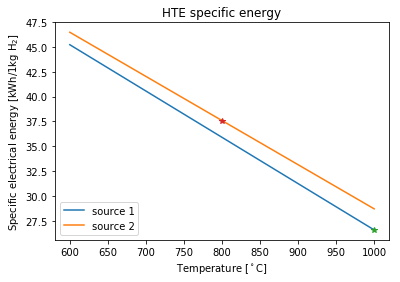

In [65]:
import matplotlib.pyplot as plt
seht1 = []
seht2 = []
temp = [600, 700, 800, 900, 1000]
for T in temp:
    seht1.append((se1000-see)/(1000-20)*(T-20)+see)
    seht2.append((se800-see)/(800-20)*(T-20)+see)

plt.plot(temp, seht1, label='source 1')
plt.plot(temp, seht2, label='source 2')
plt.plot(temp[temp.index(1000)], seht1[temp.index(1000)], marker='*')
plt.plot(temp[temp.index(800)], seht2[temp.index(800)], marker='*')
plt.legend(loc="lower left")
plt.title('HTE specific energy')
plt.ylabel('Specific electrical energy [kWh/1kg H$_2$]')
plt.xlabel('Temperature [$^\circ$C]')

Previously, we calculated the electric energy required to produce H$_2$ given we have the high temperature steam. Some reactors can supply such high temperatures, but some cannot. So the next step is to calculate how much natural gas is required to boost the temperature of the steam to usable values.

We assume that the temperature of the water feeding the natural gas system is equal to the outlet temperature of the reactor.

### Steam from Natural Gas:

Calculation dependes on boiler efficiency, feedwater temperature, and steam pressure.

Typical pressures of HTE, steam methane reforming, and sulfur-iodine thermochemical cycle.
Do the differnet methods use saturated or superheated steam?

HTE Pressures:
P = 3.5 MPa <cite data-cite="6356110/M4HF3HHP"></cite>


In [ ]:
E = 1e5 # [Btu/therm], 1 therm = 97.84 cubic feet
E = E / 3412.14  # [kwh/therm]
E = E * 0.857  # boiler efficiency, assumes that has feedwater economizer or air preheaters 

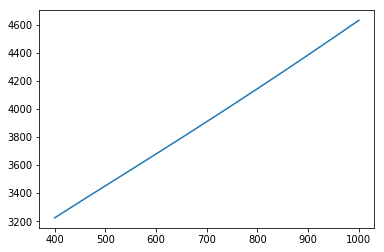

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# to produce 1 kg of H2 we need 'mw' kg of steam
df1 = pd.read_csv("steam-properties.csv")
plt.plot(df1['Temperature(C)'], df1['Enthalpy(kJ/kg)'])
plt.title('Steam specific enthalpy for P=3.5 MPa')
plt.ylabel('Specific Enthalpy [kJ/kg]')
plt.xlabel('Temperature [$^\circ$C]')

# inT = 500  # [C] inlet T
# ouT = 800  # [C]